In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
import plotly.express as px

In [49]:
'''import requests
import csv
from datetime import datetime, timedelta

# Replace with your API key
API_KEY = " 56cdd10fcb5c468cbb4193934241803"

# Set the location and date range for historic weather data
location = input('enter location')
start_date = datetime(2024, 6, 13)  # Start date (YYYY, MM, DD)
end_date = datetime(2024, 6, 19)   # End date (YYYY, MM, DD)

# Set the base URL and parameters for the API request
base_url = "http://api.weatherapi.com/v1/history.json"
params = {
    "key": API_KEY,
    "q": location,
    "dt": start_date.strftime("%Y-%m-%d")
}

# Initialize an empty list to store weather data
weather_data = []

# Loop through the date range and fetch weather data for each day
current_date = start_date
while current_date <= end_date:
    params["dt"] = current_date.strftime("%Y-%m-%d")
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        for forecast in data["forecast"]["forecastday"]:
            for hour in forecast["hour"]:
                weather_data.append({
                    "Date": hour["time"].split(" ")[0],
                    "Time": hour["time"].split(" ")[1],
                    "Temperature (C)": hour["temp_c"],
                    "Humidity": hour["humidity"],
                    "Wind Speed (km/h)": hour["wind_kph"],
                    "Precipitation (mm)": hour["precip_mm"]
                })
    else:
        print(f"Error fetching data for {current_date}: {response.status_code} - {response.text}")
    
    current_date += timedelta(days=1)

# Save weather data to a CSV file
with open("historic_weather_data.csv", "w", newline="") as csvfile:
    fieldnames = ["Date", "Time", "Temperature (C)", "Humidity", "Wind Speed (km/h)", "Precipitation (mm)"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for data in weather_data:
        writer.writerow(data)

print(f"Historic weather data of {location} saved to historic_weather_data.csv")'''

'import requests\nimport csv\nfrom datetime import datetime, timedelta\n\n# Replace with your API key\nAPI_KEY = " 56cdd10fcb5c468cbb4193934241803"\n\n# Set the location and date range for historic weather data\nlocation = input(\'enter location\')\nstart_date = datetime(2024, 6, 13)  # Start date (YYYY, MM, DD)\nend_date = datetime(2024, 6, 19)   # End date (YYYY, MM, DD)\n\n# Set the base URL and parameters for the API request\nbase_url = "http://api.weatherapi.com/v1/history.json"\nparams = {\n    "key": API_KEY,\n    "q": location,\n    "dt": start_date.strftime("%Y-%m-%d")\n}\n\n# Initialize an empty list to store weather data\nweather_data = []\n\n# Loop through the date range and fetch weather data for each day\ncurrent_date = start_date\nwhile current_date <= end_date:\n    params["dt"] = current_date.strftime("%Y-%m-%d")\n    response = requests.get(base_url, params=params)\n    \n    if response.status_code == 200:\n        data = response.json()\n        for forecast in data

In [50]:
weather01 = pd.read_csv('historic_weather_data.csv')
weather01

,Date,Time,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm)
0,2024-06-13,00:00,23.6,86,13.7,0.00
1,2024-06-13,01:00,23.4,87,13.7,0.00
2,2024-06-13,02:00,23.4,87,13.3,0.00
3,2024-06-13,03:00,23.4,86,13.3,0.00
4,2024-06-13,04:00,23.3,86,12.2,0.01
...,...,...,...,...,...,...
163,2024-06-19,19:00,24.8,73,19.4,0.00
164,2024-06-19,20:00,24.8,75,18.0,0.00
165,2024-06-19,21:00,24.4,77,17.6,0.00
166,2024-06-19,22:00,24.2,79,15.5,0.00


In [51]:
weather01['datetime'] = pd.to_datetime(weather01['Date'] + ' ' + weather01['Time'])

weather01.drop(columns=['Date', 'Time'], inplace=True)
weather01

,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm),datetime
0,23.6,86,13.7,0.00,2024-06-13 00:00:00
1,23.4,87,13.7,0.00,2024-06-13 01:00:00
2,23.4,87,13.3,0.00,2024-06-13 02:00:00
3,23.4,86,13.3,0.00,2024-06-13 03:00:00
4,23.3,86,12.2,0.01,2024-06-13 04:00:00
...,...,...,...,...,...
163,24.8,73,19.4,0.00,2024-06-19 19:00:00
164,24.8,75,18.0,0.00,2024-06-19 20:00:00
165,24.4,77,17.6,0.00,2024-06-19 21:00:00
166,24.2,79,15.5,0.00,2024-06-19 22:00:00


In [52]:
mpl.rcParams['figure.figsize'] = (15,6)


In [53]:
weather01= weather01.set_index('datetime')

In [54]:
weather01

,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm)
datetime,,,,
2024-06-13 00:00:00,23.6,86,13.7,0.00
2024-06-13 01:00:00,23.4,87,13.7,0.00
2024-06-13 02:00:00,23.4,87,13.3,0.00
2024-06-13 03:00:00,23.4,86,13.3,0.00
2024-06-13 04:00:00,23.3,86,12.2,0.01
...,...,...,...,...
2024-06-19 19:00:00,24.8,73,19.4,0.00
2024-06-19 20:00:00,24.8,75,18.0,0.00
2024-06-19 21:00:00,24.4,77,17.6,0.00


In [55]:
weather01 = weather01.reset_index()[['datetime','Temperature (C)','Humidity','Wind Speed (km/h)','Precipitation (mm)']].rename({'datetime':'ds','Temperature (C)':'y'}, axis = 'columns')

c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shree\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='ds', ylabel='y'>

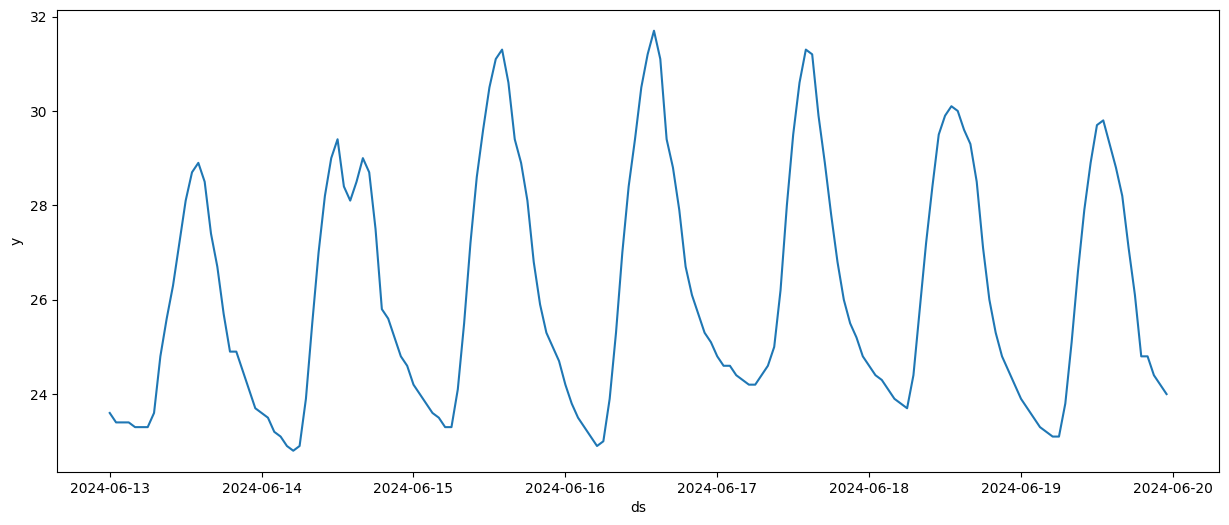

In [56]:
import seaborn as sns
sns.lineplot(x = 'ds', y= 'y', data= weather01)

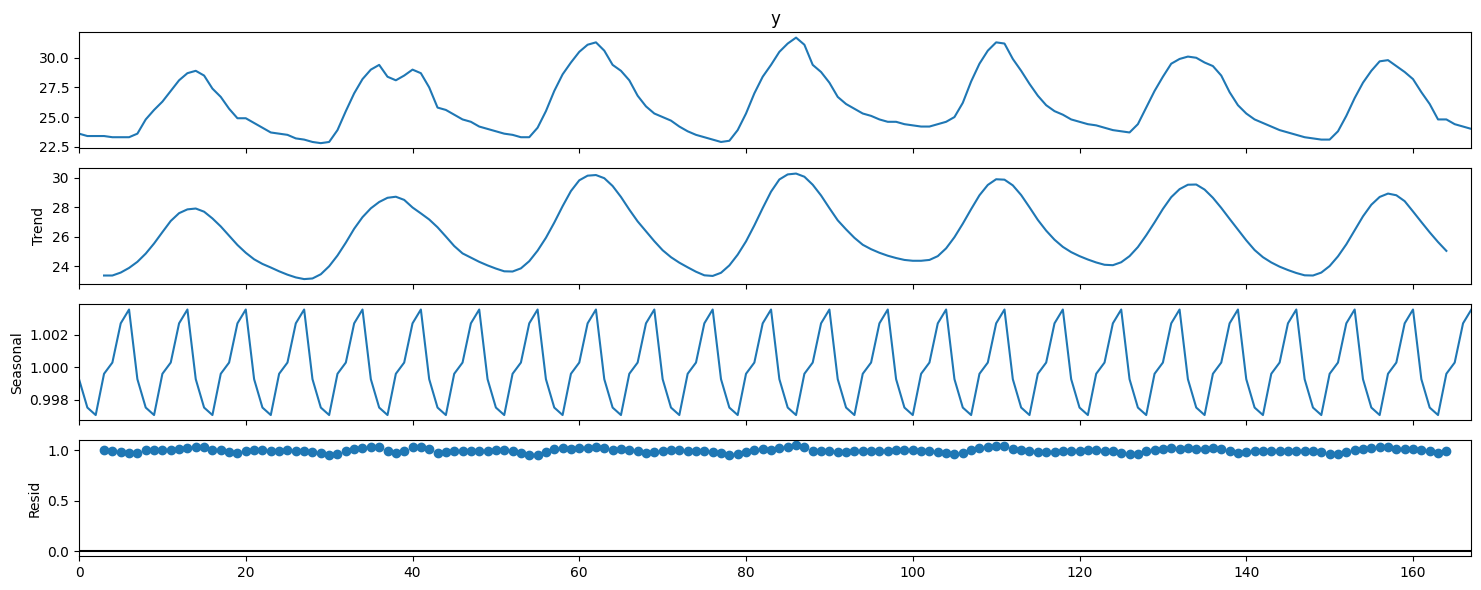

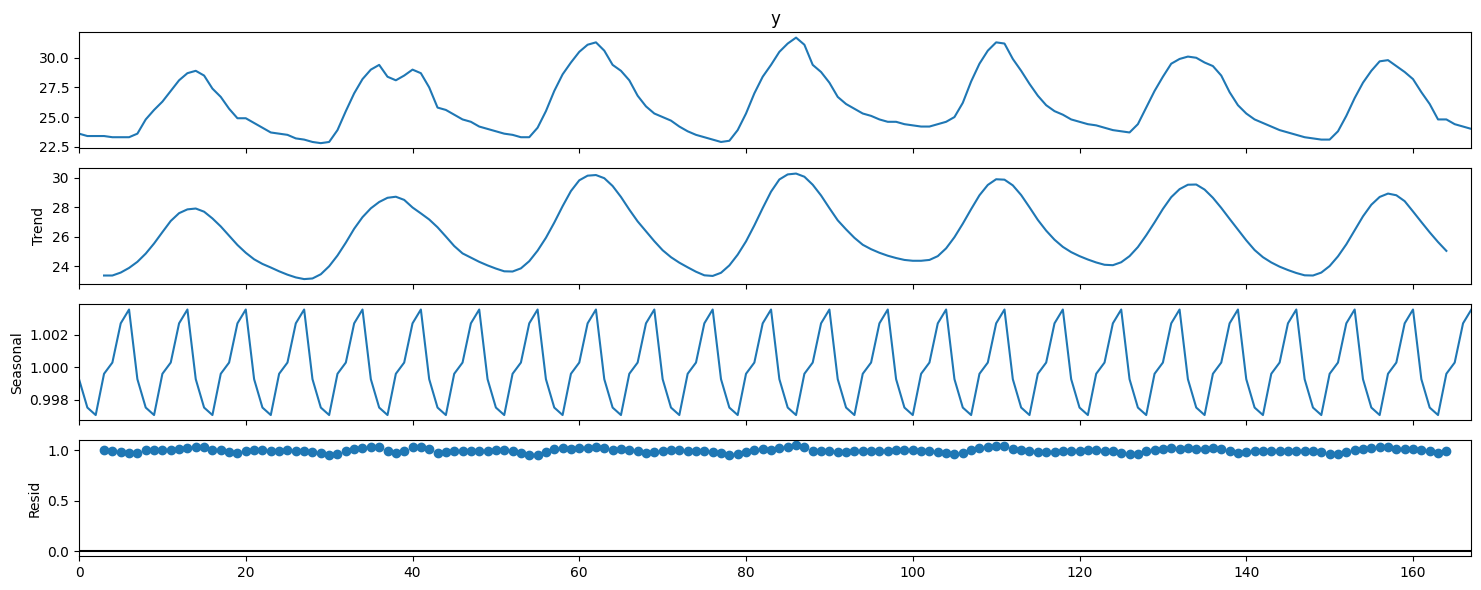

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
temperature = seasonal_decompose(weather01['y'] , model = 'multiplicative' , period = 7)
temperature.plot()



In [58]:
weather01.tail(50)

,ds,y,Humidity,Wind Speed (km/h),Precipitation (mm)
118,2024-06-17 22:00:00,25.2,80,15.1,0.00
119,2024-06-17 23:00:00,24.8,81,14.0,0.00
120,2024-06-18 00:00:00,24.6,81,11.5,0.00
121,2024-06-18 01:00:00,24.4,82,10.8,0.00
122,2024-06-18 02:00:00,24.3,83,11.9,0.00
123,2024-06-18 03:00:00,24.1,84,10.8,0.00
124,2024-06-18 04:00:00,23.9,85,9.7,0.00
125,2024-06-18 05:00:00,23.8,85,8.3,0.00
126,2024-06-18 06:00:00,23.7,86,9.7,0.00
127,2024-06-18 07:00:00,24.4,81,13.7,0.00


In [59]:
training_data = weather01[(weather01['ds'] >= '2024-06-13 00:00:00' )& (weather01['ds'] <= '2024-06-17 22:00:00')]
test_data = weather01[(weather01['ds'] > '2024-06-17 22:00:00')]
training_data.shape, test_data.shape # 70/30 split


((119, 5), (49, 5))

In [60]:
from prophet import  Prophet
m = Prophet()

In [61]:
m.fit(weather01)

22:14:55 - cmdstanpy - INFO - Chain [1] start processing
22:14:55 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
173,2024-06-25 23:00:00
174,2024-06-26 23:00:00
175,2024-06-27 23:00:00
176,2024-06-28 23:00:00
177,2024-06-29 23:00:00


In [63]:
forecast= m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
173,2024-06-25 23:00:00,19.900742,18.661013,21.038324
174,2024-06-26 23:00:00,19.263552,17.832882,20.665054
175,2024-06-27 23:00:00,18.626362,16.886882,20.333339
176,2024-06-28 23:00:00,17.989172,15.981741,19.821061
177,2024-06-29 23:00:00,17.351983,15.031803,19.531128


In [64]:
from prophet.plot import plot_plotly
plot_plotly(m,forecast)

c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [65]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
173,2024-06-25 23:00:00,19.900742,18.661013,21.038324
174,2024-06-26 23:00:00,19.263552,17.832882,20.665054
175,2024-06-27 23:00:00,18.626362,16.886882,20.333339
176,2024-06-28 23:00:00,17.989172,15.981741,19.821061
177,2024-06-29 23:00:00,17.351983,15.031803,19.531128


c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



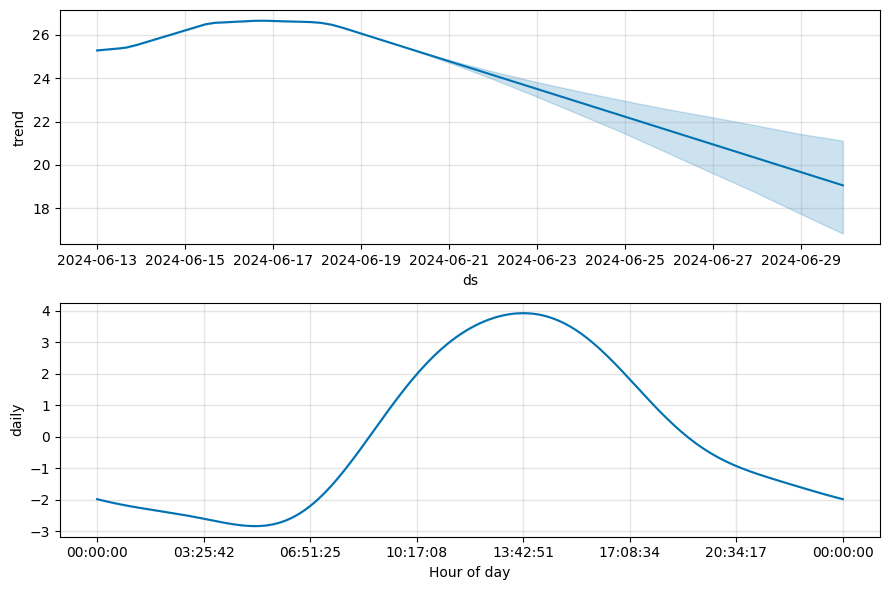

In [66]:
fig_2 = m.plot_components(forecast)

In [67]:
import pickle
with open('prophet.pkl','wb') as files:
    pickle.dump(m, files)


In [69]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import datetime

# ... your existing model fitting code (model = Prophet(), model.fit(df), etc.)

# User interaction and prediction
user_date_str = input("Enter the date and time you want to predict in YYYY-MM-DD HH:MM format (e.g., 2025-12-31 15:00:00): ")

try:
  user_date_time = datetime.strptime(user_date_str, "%Y-%m-%d %H:%M")
except ValueError:
  print("Invalid date and time format. Please enter YYYY-MM-DD HH:MM:SS.")
  exit()

# Prophet works with dates, so extract the date part
user_date = user_date_time.date()

future_date = pd.DataFrame({'ds': [user_date]})

# Informational message about time being ignored
print("Since Prophet focuses on daily trends, the specific time won't be used in the prediction, but the date is considered.")

one_day_forecast = m.predict(future_date)
predicted_temp = one_day_forecast["yhat"].values[0]

print(f"Predicted temperature for {user_date_str} is: {predicted_temp:.2f}")


Since Prophet focuses on daily trends, the specific time won't be used in the prediction, but the date is considered.
Predicted temperature for 2024-06-20 22:15 is: 23.43
